In [1]:
%matplotlib inline
import geopandas as gpd
import datacube
import numpy as np
import sys
import matplotlib.pyplot as plt
import xarray as xr
sys.path.append('./utils')
import jncc_utils # jncc utils file containing helper functions from open data cube resources
from datacube.utils import masking
import pandas as pd
import calendar
# you can remove this is you want to see any warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
dc = datacube.Datacube()

<AxesSubplot:>

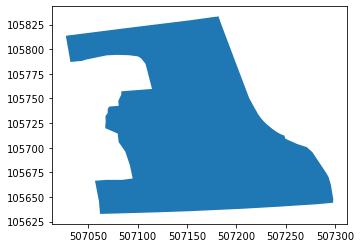

In [3]:
# read in NFI data from SDNP and plot
gdf = gpd.read_file('./data/NFI_SDNPA_2020.shp')
gdf = gdf[gdf['IFT_IOA'] == 'Broadleaved']
gdf_selected = gdf.iloc[[0]]
gdf_selected.plot()

In [4]:
# use gdf bounds as extent for datacube query
query = {
    'time': ('2019-01-01','2019-12-31'),
    'output_crs': 'epsg:27700',
    'x': (gdf_selected.total_bounds[0], gdf_selected.total_bounds[2]),
    'y': (gdf_selected.total_bounds[1], gdf_selected.total_bounds[3]),
    'crs': 'epsg:27700',
    'resolution': (-10,10),
    'measurements':('red', 'fmask', 'nir2')
}

ds = dc.load(product='sentinel2',
            dask_chunks = {},
            **query)

In [5]:
ds

<xarray.Dataset>
Dimensions:      (time: 139, y: 21, x: 28)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-04T11:04:39 ... 2019-12-30T11:...
  * y            (y) float64 1.058e+05 1.058e+05 ... 1.056e+05 1.056e+05
  * x            (x) float64 5.07e+05 5.07e+05 5.07e+05 ... 5.073e+05 5.073e+05
    spatial_ref  int32 27700
Data variables:
    red          (time, y, x) uint16 dask.array<chunksize=(1, 21, 28), meta=np.ndarray>
    fmask        (time, y, x) uint8 dask.array<chunksize=(1, 21, 28), meta=np.ndarray>
    nir2         (time, y, x) uint16 dask.array<chunksize=(1, 21, 28), meta=np.ndarray>
Attributes:
    crs:           EPSG:27700
    grid_mapping:  spatial_ref

In [6]:
ds.time

<xarray.DataArray 'time' (time: 139)>
array(['2019-01-04T11:04:39.000000000', '2019-01-09T11:04:31.000000000',
       '2019-01-10T11:24:39.000000000', '2019-01-17T11:14:09.000000000',
       '2019-01-20T11:24:09.000000000', '2019-01-22T11:13:51.000000000',
       '2019-01-27T11:13:29.000000000', '2019-01-30T11:23:19.000000000',
       '2019-02-01T11:13:01.000000000', '2019-02-03T11:02:49.000000000',
       '2019-02-11T11:12:01.000000000', '2019-02-14T11:21:51.000000000',
       '2019-02-19T11:21:19.000000000', '2019-02-21T11:11:01.000000000',
       '2019-02-23T11:00:39.000000000', '2019-02-24T11:21:11.000000000',
       '2019-02-26T11:10:49.000000000', '2019-02-28T11:00:01.000000000',
       '2019-03-01T11:21:09.000000000', '2019-03-05T11:00:29.000000000',
       '2019-03-10T10:58:51.000000000', '2019-03-11T11:21:09.000000000',
       '2019-03-13T11:08:31.000000000', '2019-03-18T11:07:59.000000000',
       '2019-03-20T10:57:41.000000000', '2019-03-25T10:57:09.000000000',
       '2019-03-26T11:21:11.000000000', '2019-03-28T11:10:49.000000000',
       '2019-03-30T10:56:31.000000000', '2019-03-31T11:21:19.000000000',
       '2019-04-07T11:06:29.000000000', '2019-04-10T11:21:19.000000000',
       '2019-04-12T11:06:21.000000000', '2019-04-19T10:56:21.000000000',
       '2019-04-20T11:21:19.000000000', '2019-04-22T11:06:21.000000000',
       '2019-04-24T10:56:29.000000000', '2019-04-25T11:21:21.000000000',
       '2019-04-27T11:06:29.000000000', '2019-04-29T10:56:21.000000000',
       '2019-04-30T11:21:19.000000000', '2019-05-04T10:56:29.000000000',
       '2019-05-07T11:06:29.000000000', '2019-05-10T11:21:19.000000000',
       '2019-05-12T11:06:21.000000000', '2019-05-14T10:56:29.000000000',
       '2019-05-15T11:21:21.000000000', '2019-05-24T10:56:29.000000000',
       '2019-05-25T11:21:21.000000000', '2019-05-27T11:06:29.000000000',
       '2019-05-30T11:21:19.000000000', '2019-06-01T11:06:21.000000000',
       '2019-06-03T10:56:29.000000000', '2019-06-04T11:21:21.000000000',
       '2019-06-06T11:06:29.000000000', '2019-06-08T10:56:21.000000000',
       '2019-06-09T11:21:19.000000000', '2019-06-11T11:06:21.000000000',
       '2019-06-13T10:56:29.000000000', '2019-06-14T11:21:21.000000000',
       '2019-06-16T11:06:29.000000000', '2019-06-21T11:06:21.000000000',
       '2019-06-26T11:06:29.000000000', '2019-06-28T10:56:21.000000000',
       '2019-06-29T11:21:19.000000000', '2019-07-01T11:06:21.000000000',
       '2019-07-03T10:56:29.000000000', '2019-07-04T11:21:21.000000000',
       '2019-07-06T11:06:29.000000000', '2019-07-08T10:56:21.000000000',
       '2019-07-09T11:21:19.000000000', '2019-07-11T11:06:31.000000000',
       '2019-07-13T10:56:29.000000000', '2019-07-16T11:06:29.000000000',
       '2019-07-23T10:56:29.000000000', '2019-07-24T11:21:21.000000000',
       '2019-07-26T11:06:29.000000000', '2019-07-28T10:56:21.000000000',
       '2019-07-29T11:21:19.000000000', '2019-07-31T11:06:21.000000000',
       '2019-08-02T10:56:29.000000000', '2019-08-05T11:06:29.000000000',
       '2019-08-07T10:56:21.000000000', '2019-08-08T11:21:19.000000000',
       '2019-08-10T11:06:21.000000000', '2019-08-13T11:21:21.000000000',
       '2019-08-15T11:06:29.000000000', '2019-08-18T11:21:19.000000000',
       '2019-08-20T11:06:21.000000000', '2019-08-22T10:56:29.000000000',
       '2019-08-23T11:21:21.000000000', '2019-08-25T11:06:29.000000000',
       '2019-08-27T10:56:21.000000000', '2019-08-28T11:21:19.000000000',
       '2019-08-30T11:06:21.000000000', '2019-09-01T10:56:19.000000000',
       '2019-09-02T11:21:11.000000000', '2019-09-04T11:06:19.000000000',
       '2019-09-12T11:21:11.000000000', '2019-09-14T11:06:49.000000000',
       '2019-09-17T11:21:19.000000000', '2019-09-19T11:07:21.000000000',
       '2019-09-21T10:57:39.000000000', '2019-09-22T11:21:11.000000000',
       '2019-09-24T11:07:59.000000000', '2019-10-01T10:58:49.000000000',
       '2019-10-02T11:21:21.000000000', '2019-10-04T11:09:09.000000000',
       '2019-10-06T1

In [7]:
ds['red'] = ds.red.where(ds.fmask==0)
ds['nir2'] = ds.nir2.where(ds.fmask==0)

ds = masking.mask_invalid_data(ds)
ndvi = ((ds.nir2-ds.red)/(ds.nir2+ds.red))

ndvi

<xarray.DataArray (time: 139, y: 21, x: 28)>
dask.array<truediv, shape=(139, 21, 28), dtype=float64, chunksize=(1, 21, 28), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2019-01-04T11:04:39 ... 2019-12-30T11:...
  * y            (y) float64 1.058e+05 1.058e+05 ... 1.056e+05 1.056e+05
  * x            (x) float64 5.07e+05 5.07e+05 5.07e+05 ... 5.073e+05 5.073e+05
    spatial_ref  int32 27700

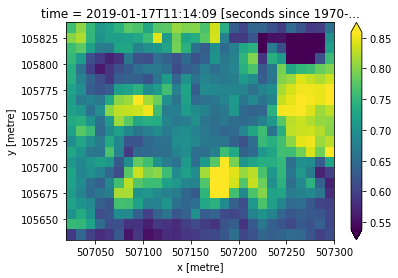

In [8]:
single_slice = ndvi.isel(time=3)
single_slice.plot(robust=True)

In [9]:
plot1 = ds.red.isel(time=3)
mask = jncc_utils.xr_rasterize(gdf_selected, plot1)
masked_da = ndvi.where(mask)

Rasterizing to match xarray.DataArray dimensions (21, 28) and projection system/CRS (e.g. EPSG:27700)


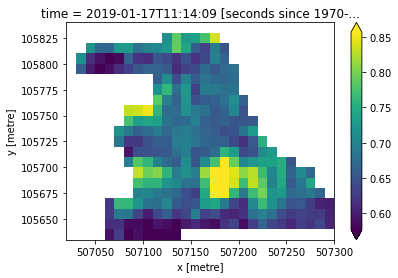

In [10]:
single_slice = masked_da.isel(time=3)
single_slice.plot(robust=True)

In [11]:
ndvi_month_grps = masked_da.groupby('time.month')
ndvi_month_median = ndvi_month_grps.median(dim = 'time')

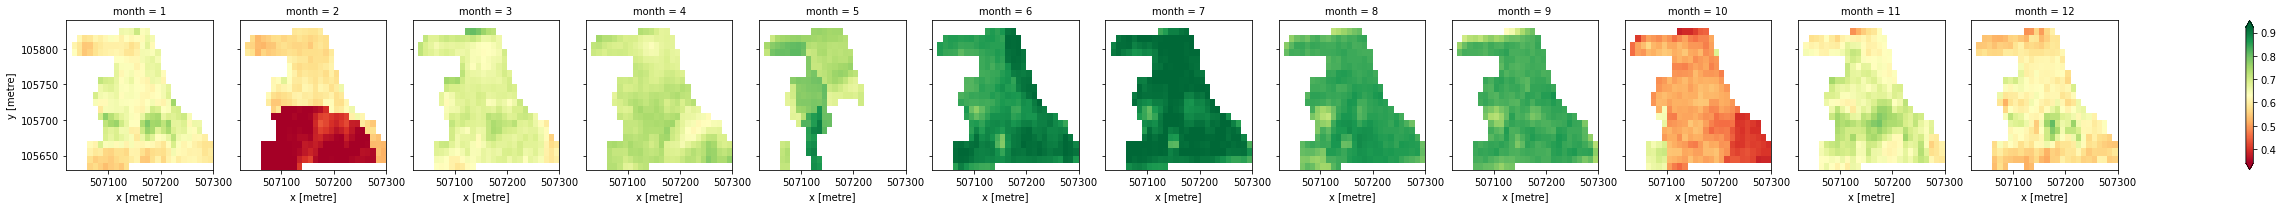

In [12]:
ndvi_month_median.plot(col="month", robust=True, cmap="RdYlGn")

In [13]:
ndvi_values = ndvi_month_median.mean(['x', 'y']).values

<AxesSubplot:xlabel='time'>

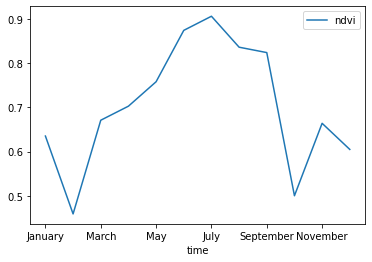

In [14]:

m=[calendar.month_name[i] for i in range(1,13)]
df = pd.DataFrame({'time': m, 'ndvi': list(ndvi_values)}, columns=['time', 'ndvi'])
df = df[df['ndvi'] > 0.1]
df.set_index('time')
df.plot(x='time', y='ndvi')